In [123]:

words = open('names.txt','r').read().splitlines()

In [124]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [125]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
sorted(b.items(),key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [126]:
import torch


a = torch.zeros((3,5),dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [127]:
N = torch.zeros((28,28),dtype=torch.int32)
chars = sorted(list(set(''.join(words))))

# Create a dictionary mapping each character to its index
# This is a "string to index" (stoi) mapping that will be used to convert characters to numerical indices
# enumerate(chars) gives pairs of (index, character) which we reverse to create (character: index) pairs
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}

In [128]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline


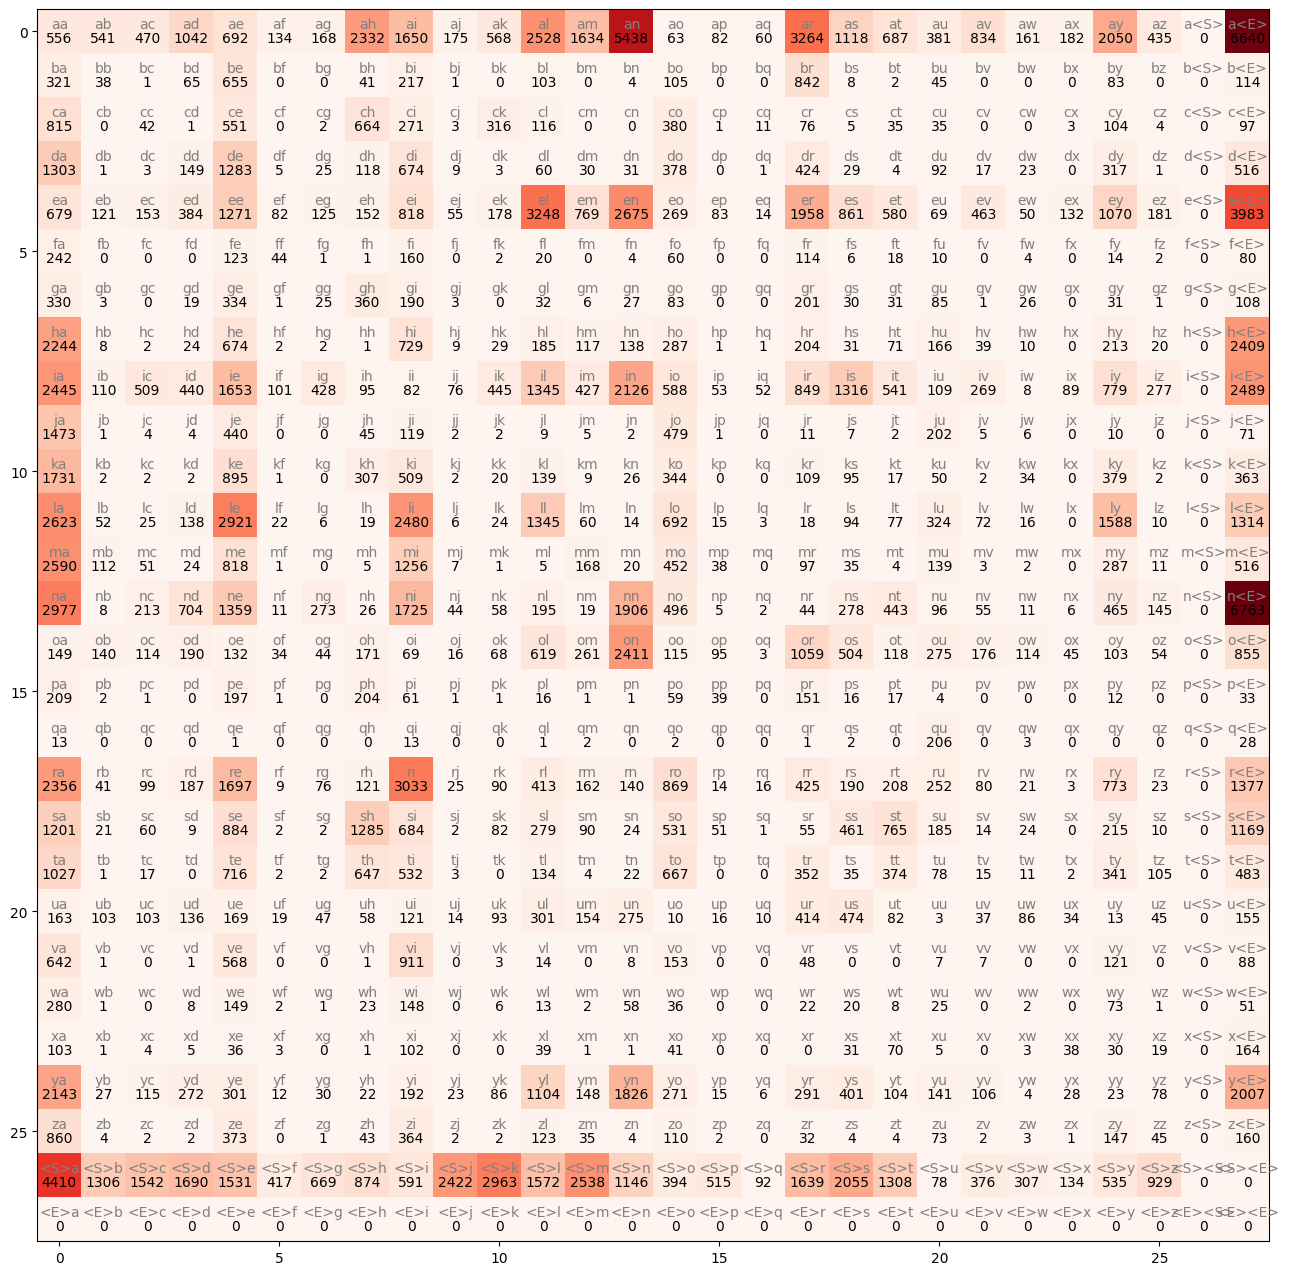

In [130]:
def drawbigram(N):
    plt.figure(figsize=(16,16))
    plt.imshow(N, cmap='Reds')
    for i in range(N.shape[0]):
        for j in range(N.shape[1]):
            chstr = itos[i] + itos[j]
            plt.text(j,i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j,i, N[i,j].item(), ha="center", va="top", color='black')

drawbigram(N)

In [131]:
# New mapping without stuff

N=torch.zeros((27,27), dtype=torch.int32)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [132]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

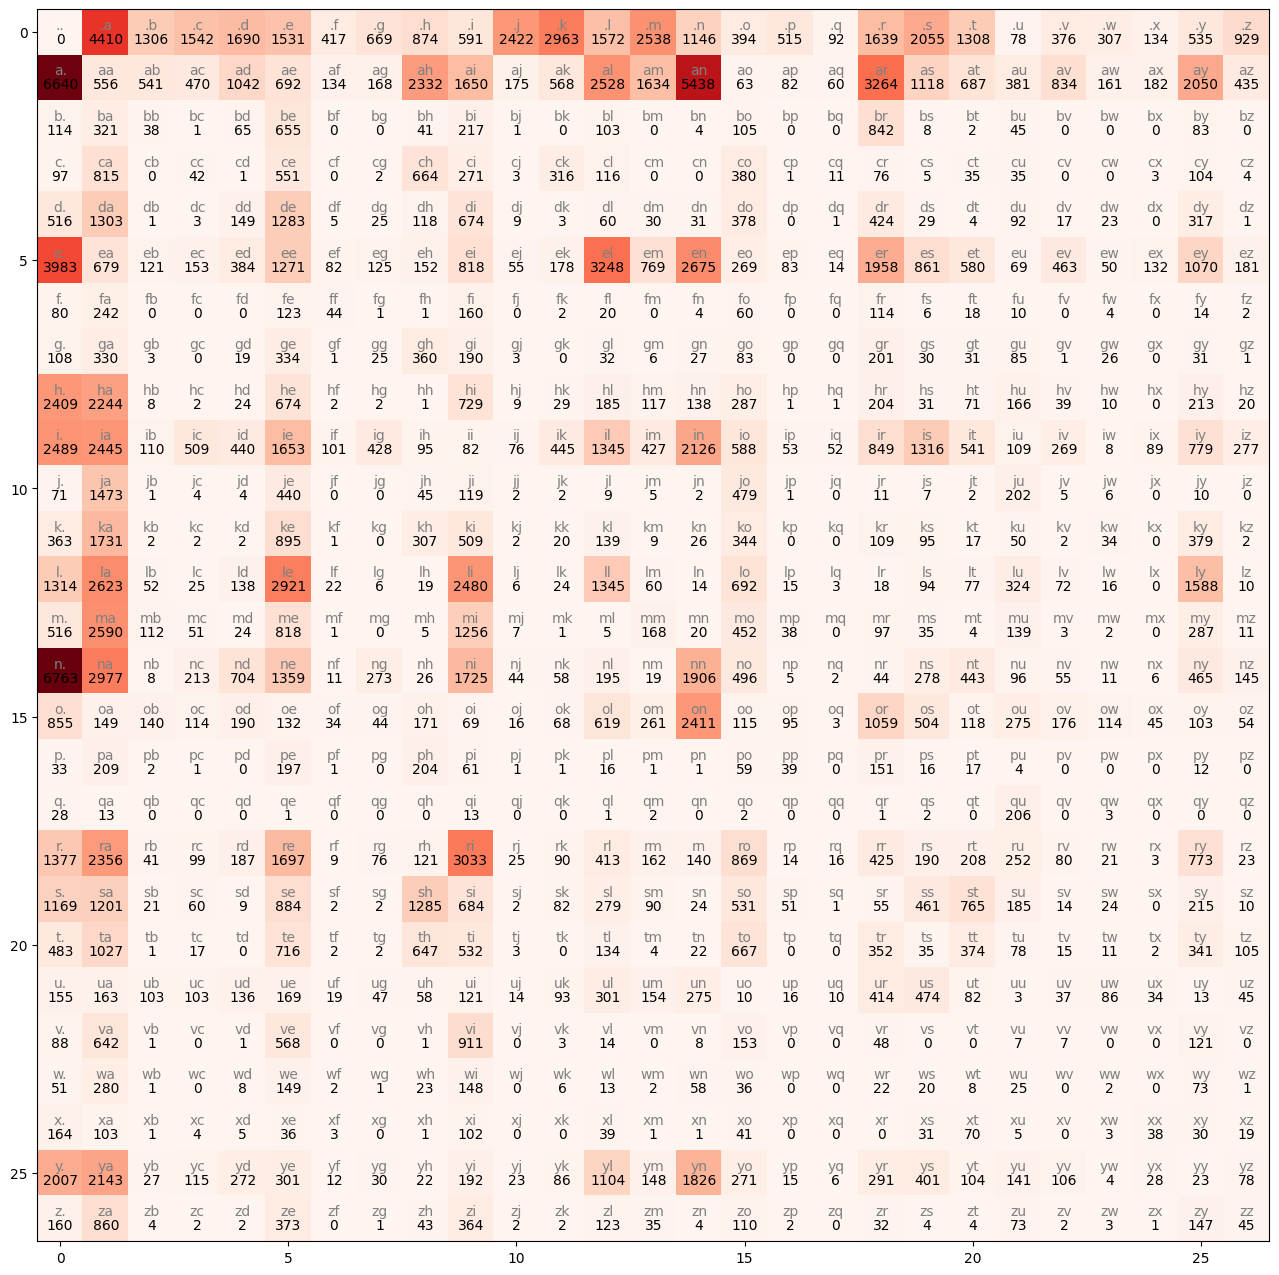

In [133]:
drawbigram(N)

In [134]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [135]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [136]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)

In [137]:
ix = 0
g = torch.Generator().manual_seed(2147483647)
for _ in range(20):
    out = []
    while True:
        # Get the row
        p = P[ix]
        #p = torch.ones(p.shape[0])
        #p = p / p.sum()
        # Sample one from it using multinomial
        ix = torch.multinomial(p,num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush


In [138]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        #print(f"{ch1}{ch2}: {prob:.4f}, {logprob:.4f}")
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


# Moving to doing this with NN gradients

## Create the training set

In [143]:
# Training set of bigrams (x,y)
xs,ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

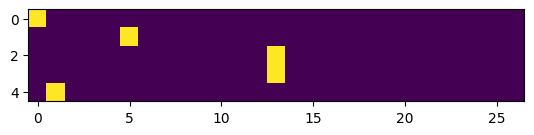

In [150]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()
plt.imshow(xenc)

In [155]:
W = torch.randn([27,1])
xenc @ W

tensor([[ 0.1552],
        [-1.6299],
        [-0.6381],
        [-0.6381],
        [-0.7826]])

In [174]:
W = torch.randn([27,27])
W

tensor([[ 1.4041, -0.6157,  0.9202,  2.4137, -1.2947,  0.1178, -1.4458, -0.1003,
         -0.3508, -0.0160, -1.5708, -1.9213, -0.4747, -0.5176, -0.4613, -0.7256,
         -1.9696, -1.5716,  0.1398, -0.1737, -0.3977,  0.1287,  0.9095, -0.1588,
         -0.6621, -0.3396, -0.0585],
        [-2.1173,  0.8379,  1.1397,  0.8704,  1.1606,  0.0152, -0.5938, -1.5692,
          2.6218,  0.9158,  1.3010,  0.4778,  1.5014,  0.0875,  0.4517,  1.1858,
         -0.2116, -1.6725, -1.3964,  0.7759, -1.2441, -0.0680,  0.6414,  0.5391,
          0.2938, -0.8043,  1.1337],
        [-0.4671, -2.0744, -0.2025, -0.3136,  0.0549,  1.0168,  1.1152, -0.4501,
          0.2075, -0.6094,  0.0727, -0.7441, -1.1806, -0.1352,  0.1768, -1.5148,
          0.5111, -0.6585, -0.1922,  0.4166,  0.3431, -0.4987,  0.6822,  0.3054,
         -0.1917, -0.1307, -0.7001],
        [-0.8335,  0.3610, -1.6143, -1.8072, -1.2581, -1.2340,  0.3007, -0.5263,
          0.6564, -1.3189,  1.9757,  0.1539,  0.3877,  0.8270, -0.4957, -1.3548

In [168]:
# (5,27) @ (27,27) -> (5,27)

(xenc @ W).shape

torch.Size([5, 27])

In [170]:
logits = xenc @ W
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
prob

tensor([[0.0704, 0.0290, 0.0110, 0.0064, 0.0742, 0.0255, 0.0184, 0.0126, 0.0136,
         0.0526, 0.0087, 0.0123, 0.0287, 0.0293, 0.0153, 0.0608, 0.2114, 0.0238,
         0.0223, 0.0182, 0.1160, 0.0072, 0.0342, 0.0021, 0.0255, 0.0071, 0.0632],
        [0.0272, 0.0257, 0.0165, 0.0138, 0.0132, 0.0811, 0.1469, 0.0453, 0.0273,
         0.0276, 0.0090, 0.0224, 0.0864, 0.0078, 0.0144, 0.0607, 0.0648, 0.0195,
         0.0388, 0.0392, 0.0578, 0.0206, 0.0087, 0.0111, 0.0487, 0.0563, 0.0092],
        [0.0126, 0.0741, 0.0137, 0.1035, 0.0039, 0.0028, 0.0422, 0.0283, 0.1249,
         0.0071, 0.3488, 0.0112, 0.0055, 0.0158, 0.0207, 0.0266, 0.0098, 0.0024,
         0.0191, 0.0106, 0.0065, 0.0058, 0.0249, 0.0132, 0.0171, 0.0325, 0.0164],
        [0.0126, 0.0741, 0.0137, 0.1035, 0.0039, 0.0028, 0.0422, 0.0283, 0.1249,
         0.0071, 0.3488, 0.0112, 0.0055, 0.0158, 0.0207, 0.0266, 0.0098, 0.0024,
         0.0191, 0.0106, 0.0065, 0.0058, 0.0249, 0.0132, 0.0171, 0.0325, 0.0164],
        [0.0152, 0.0076,

In [186]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [201]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# probs[0,ys[0], probs[1,ys[1]], probs[2,ys[2]]....
loss = -probs[torch.arange(5), ys].log().mean()
loss
print(loss)

tensor(3.6892, grad_fn=<NegBackward0>)


In [202]:
# Backweard pass
W.grad = None # zero grad
loss.backward()

In [203]:
# Update
W.data += -0.1 * W.grad

In [215]:
# The entire thing
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

# Training set of bigrams (x,y)
xs,ys = [],[]

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs,ys
print(f"number of examples: {len(xs)}")

number of examples: 228146


In [224]:
# Gradient decent
for k in range(100):
    # Forward
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    # probs[0,ys[0], probs[1,ys[1]], probs[2,ys[2]]....
    loss = -probs[torch.arange(len(ys)), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # Backward
    W.grad=None
    loss.backward()

    # Update
    W.data += -50 * W.grad



2.4834256172180176
2.4833855628967285
2.4833486080169678
2.4833130836486816
2.4832797050476074
2.483247756958008
2.4832167625427246
2.483186960220337
2.4831578731536865
2.4831299781799316
2.483103036880493
2.483076333999634
2.483050584793091
2.4830257892608643
2.483001232147217
2.4829771518707275
2.482954263687134
2.48293137550354
2.4829089641571045
2.4828872680664062
2.482866048812866
2.4828450679779053
2.4828243255615234
2.482804298400879
2.4827845096588135
2.482764959335327
2.482745409011841
2.482727289199829
2.482708692550659
2.4826903343200684
2.4826724529266357
2.4826548099517822
2.482637643814087
2.4826207160949707
2.4826033115386963
2.4825868606567383
2.4825708866119385
2.4825544357299805
2.482538938522339
2.482522964477539
2.4825077056884766
2.482492446899414
2.4824774265289307
2.4824626445770264
2.482448101043701
2.482433319091797
2.48241925239563
2.482405185699463
2.482390880584717
2.482377052307129
2.482363700866699
2.4823501110076904
2.4823367595672607
2.48232364654541
2.4

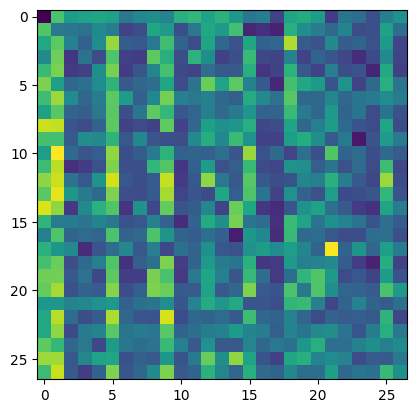

In [222]:
plt.imshow(W.detach().numpy())

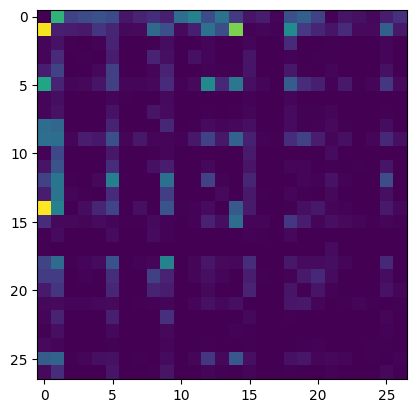

In [225]:
plt.imshow(N)

In [229]:
# Same from neural net model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

junide
janasah
prelay
a
nn
kohin
tolian
juwe
ksahnaauranilevias
dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabi
werimikimaynin
anaasn
ssorionsush
